## Excercise 8.2
Build a function to sample an exponential distribution $n$ times for $m$ experiements.

In [43]:
import math
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def VertLine(x, y=1):
    thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

def expSampling(n = 10, m = 1000, lam = 2):
    """Computes an array of means by sampling a exponential(1/lam) n times for m experiments.
        
    n: number of samples for each experiment
    m: number of experiements to simulate
    lam: lambda of the underlying exponential distribution
    
    returns: float np.array
    """
        
    means = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)
    
    return means

Run an expeirment 1000 times where a sample is taken 10 times from an exponential distribution with $\lambda = 2$. Plot the sampling distribution and calcualte the 90% confidence interval.

No handles with labels found to put in legend.


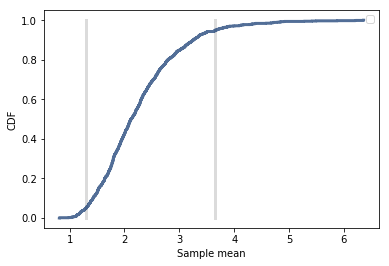

90% confidence interval (1.3014022473190723, 3.6588587122581417)
Standard error 0.8068054983642342


<Figure size 576x432 with 0 Axes>

In [47]:
means = expSampling()

# calculate CDF of the sample, confidence interval, and standard error
cdf = thinkstats2.Cdf(means)
ci = cdf.Percentile(5), cdf.Percentile(95)
sterr = RMSE(means, 2.0)

VertLine(ci[0])
VertLine(ci[1])
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Sample mean', ylabel = 'CDF')
print('90% confidence interval', ci)
print('Standard error', sterr)


Run the experiment for different values of $n$ to see the impact on the standard error of the sample mean. 

No handles with labels found to put in legend.


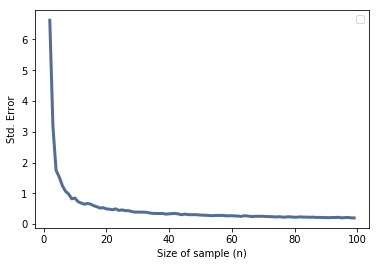

<Figure size 576x432 with 0 Axes>

In [45]:
stderr = {}
for n in range(2,100):
    means = expSampling(n=n)
    stderr[n] = RMSE(means,2.0)

thinkplot.Plot(pd.Series(stderr))
thinkplot.Show(xlabel = 'Size of sample (n)', ylabel = 'Std. Error')

The plot of standard error versus $n$, the sample size of each experiment, shows as sample size increases then the standard error of $L = 1/\bar x$ goes to 0 which means $L$ is a maximum likelihood estimator of $\lambda$.